# Diabetes-Prediction-Model
### By Aarshabh Agrawal and Anish Ayare

## Step 1: Load the Dataset

In this step, we are going to install packages, load the dataset and remove unecessary and irrelevant attributes.

In [96]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install missingno
%pip install scikit-learn
%pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.4 MB/s eta 0:00:00

[notice] A new release of pip i

In [7]:
import numpy as np  
import pandas as pd  
import os
import random

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno 

In [8]:
df = pd.read_csv('diabetes_data.csv')
df.shape

(70692, 18)

In [9]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [8]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan
    return df_missing
df = add_random_missing_values(df, missing_rate=0.02)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   67957 non-null  float64
 1   Sex                   67894 non-null  float64
 2   HighChol              67912 non-null  float64
 3   CholCheck             67967 non-null  float64
 4   BMI                   67898 non-null  float64
 5   Smoker                68045 non-null  float64
 6   HeartDiseaseorAttack  67953 non-null  float64
 7   PhysActivity          67911 non-null  float64
 8   Fruits                67919 non-null  float64
 9   Veggies               67912 non-null  float64
 10  HvyAlcoholConsump     67889 non-null  float64
 11  GenHlth               67849 non-null  float64
 12  MentHlth              67851 non-null  float64
 13  PhysHlth              67922 non-null  float64
 14  DiffWalk              67911 non-null  float64
 15  Stroke             

In [10]:
df.head(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0


In [11]:
df.tail(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0,1.0,NaN


## Step 2: Data Cleanup

In [12]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: Age
Unique Values: [ 4. 12. 13. 11.  8.  1. nan  6.  3.  7. 10.  9.  5.  2.]

Column: Sex
Unique Values: [ 1.  0. nan]

Column: HighChol
Unique Values: [ 0.  1. nan]

Column: CholCheck
Unique Values: [ 1. nan  0.]

Column: BMI
Unique Values: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. nan 38. 40. 25. 36.
 47. 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92.
 53. 98. 46. 79. 48. 16. 72. 54. 49. 68. 43. 50. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 63.
 62. 64. 66. 85. 70. 83. 80. 74.]

Column: Smoker
Unique Values: [ 0.  1. nan]

Column: HeartDiseaseorAttack
Unique Values: [ 0. nan  1.]

Column: PhysActivity
Unique Values: [ 1.  0. nan]

Column: Fruits
Unique Values: [ 0.  1. nan]

Column: Veggies
Unique Values: [ 1.  0. nan]

Column: HvyAlcoholConsump
Unique Values: [ 0. nan  1.]

Column: GenHlth
Unique Values: [ 3.  1.  2.  4.  5. nan]

Column: MentHlth
Unique Values: [ 5.  0.  7.  3.  4.  2. 30. 20

In [13]:
categorical_col = [col for col in df.columns if df[col].nunique() == 2] 

In [14]:
numerical_col = [col for col in df.columns if col not in categorical_col]

In [15]:
categorical_col

['Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [16]:
numerical_col

['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

In [25]:
df.columns[df.isnull().any()].tolist()

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [26]:
df.isnull().sum()

Age                     2735
Sex                     2798
HighChol                2780
CholCheck               2725
BMI                     2794
Smoker                  2647
HeartDiseaseorAttack    2739
PhysActivity            2781
Fruits                  2773
Veggies                 2780
HvyAlcoholConsump       2803
GenHlth                 2843
MentHlth                2841
PhysHlth                2770
DiffWalk                2781
Stroke                  2761
HighBP                  2724
Diabetes                2808
dtype: int64

In [29]:
df[df.isnull().any(axis = 1)]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
1,12.0,1.0,1.0,1.0,26.0,1.0,NaN,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,NaN,3.0,0.0,3.0,0.0,NaN,1.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,NaN,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,NaN,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,NaN,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,NaN,0.0,1.0,0.0,4.0,30.0,5.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,NaN,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70687,NaN,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
70689,13.0,0.0,NaN,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0


In [30]:
df[df.notnull().all(axis = 1)]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70680,11.0,0.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,6.0,30.0,1.0,0.0,1.0,1.0
70682,9.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,0.0,1.0,1.0
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0


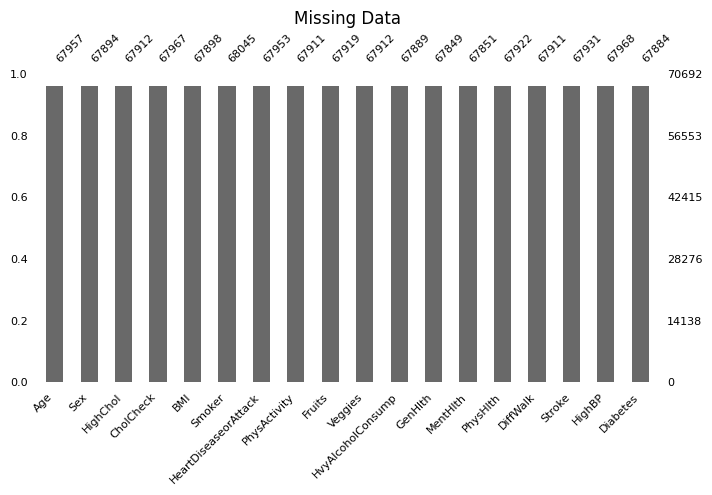

In [33]:
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 8)
plt.title("Missing Data", fontsize=12)
plt.show()

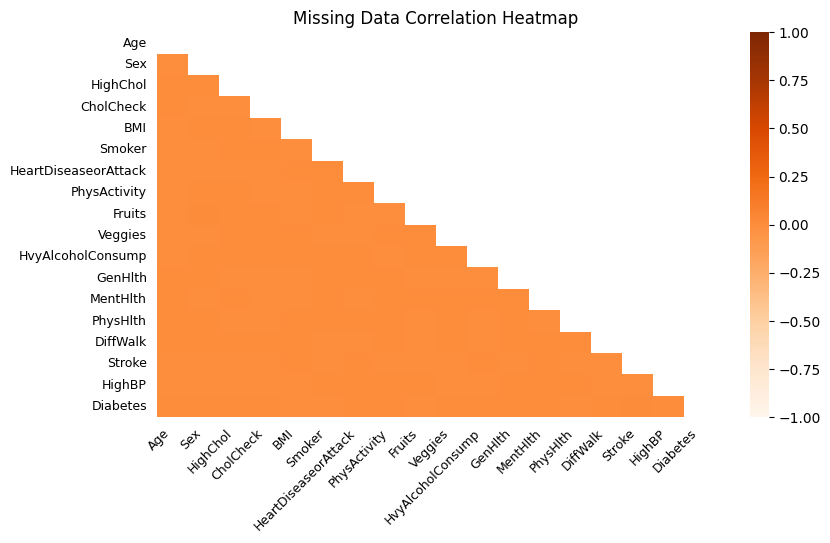

In [39]:
msno.heatmap(df = df,
             figsize = (9, 5),
             fontsize = 9,
             cmap='Oranges')
plt.title("Missing Data Correlation Heatmap", fontsize=12)
plt.show()

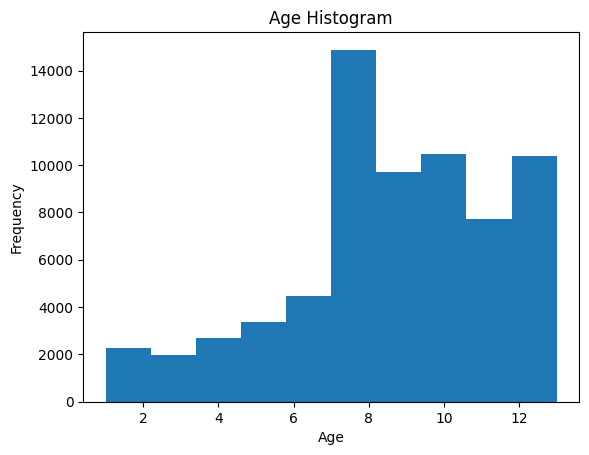

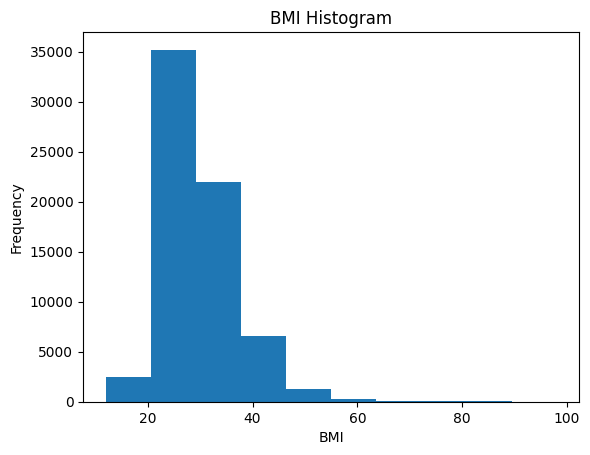

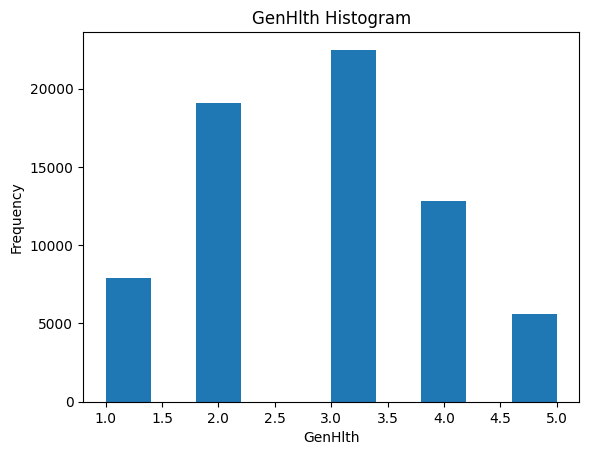

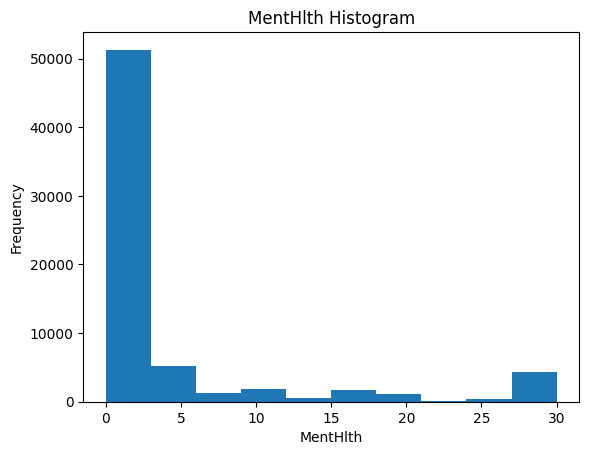

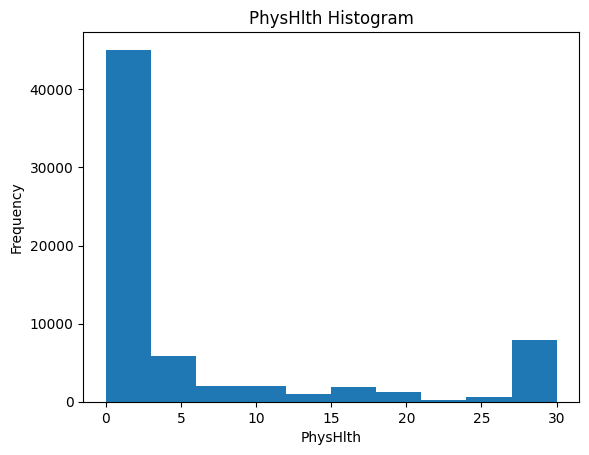

In [40]:
for col in numerical_col:
    plt.hist(df[col])
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [41]:
for col in numerical_col:
    mean = df[col].mean() 
    df[col] = df[col].fillna(mean)  

for col in categorical_col:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

print(df.isnull().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


In [42]:
df.head(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [44]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.585620,0.438904,0.544319,0.976108,29.854399,0.457973,0.141968,0.714635,0.626888,0.797021,0.041164,2.838863,3.742362,5.799947,0.242573,0.060134,0.580334,0.519960
std,2.794897,0.496257,0.498035,0.152715,6.971226,0.498234,0.349020,0.451591,0.483635,0.402220,0.198672,1.090502,7.977270,9.855034,0.428642,0.237737,0.493508,0.499605
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,5.799947,0.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Data Visualization

/var/folders/c5/7qxgkngx68b_d863h9vyqypm0000gn/T/ipykernel_64774/733318552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


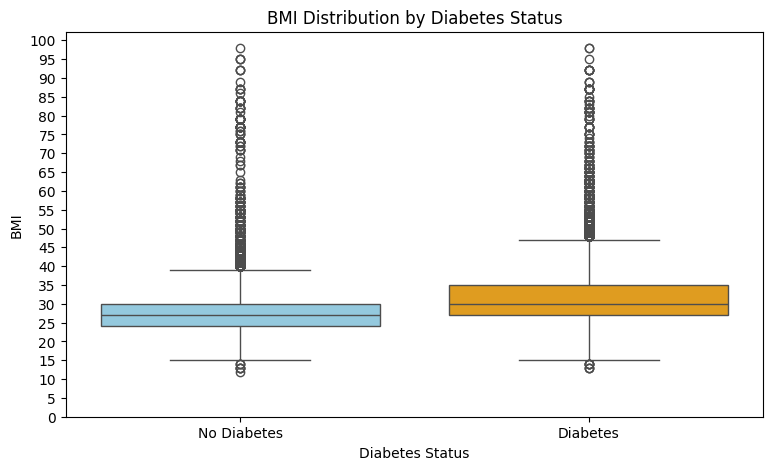

In [65]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='Diabetes',
    y='BMI', 
    data=df, 
    palette=['skyblue', 'orange'],
    legend=False
)

plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

bmi_ticks = range(0, int(df['BMI'].max()) + 5, 5)
plt.yticks(bmi_ticks)
plt.show()

/var/folders/c5/7qxgkngx68b_d863h9vyqypm0000gn/T/ipykernel_64774/2491081587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


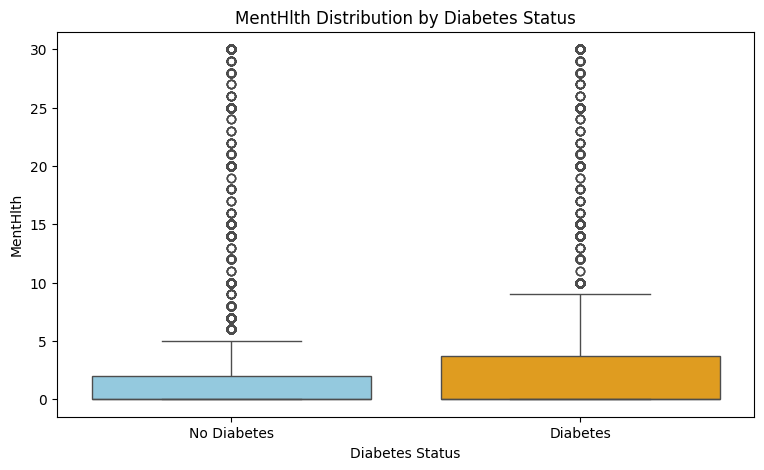

/var/folders/c5/7qxgkngx68b_d863h9vyqypm0000gn/T/ipykernel_64774/2491081587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


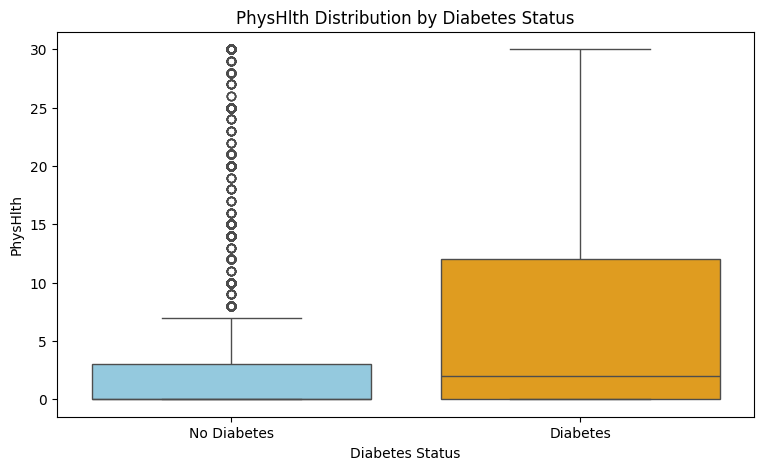

In [71]:
health_info = [
    'MentHlth', 'PhysHlth'
]

for info in health_info:
    plt.figure(figsize=(9, 5))
    sns.boxplot(
    x='Diabetes',
    y=f'{info}', 
    data=df, 
    palette=['skyblue', 'orange'],
    legend=False
    )
    plt.title(f'{info} Distribution by Diabetes Status')
    plt.xlabel('Diabetes Status')
    plt.ylabel(f'{info}')
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
    plt.show()

/var/folders/c5/7qxgkngx68b_d863h9vyqypm0000gn/T/ipykernel_64774/453316944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


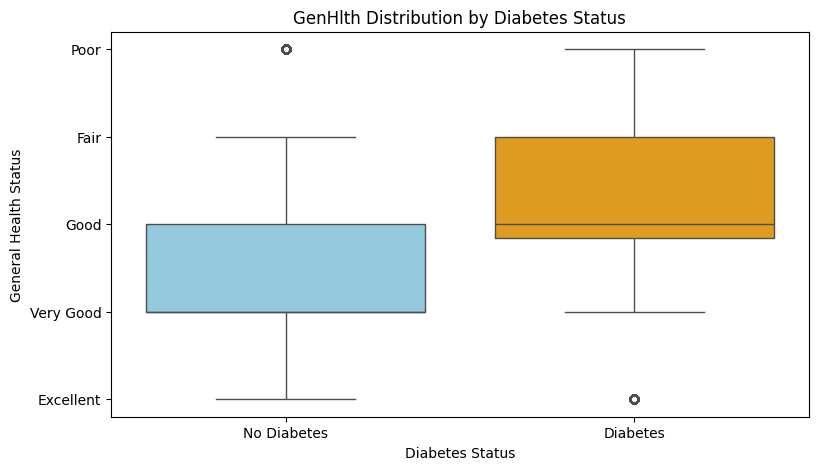

In [77]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='Diabetes',
    y='GenHlth',
    data=df,
    palette=['skyblue', 'orange'],
    legend=False)
plt.title('GenHlth Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('General Health Status')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=10)
plt.yticks([1, 2, 3, 4, 5], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], fontsize=10)
plt.show()

/var/folders/c5/7qxgkngx68b_d863h9vyqypm0000gn/T/ipykernel_64774/578701262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


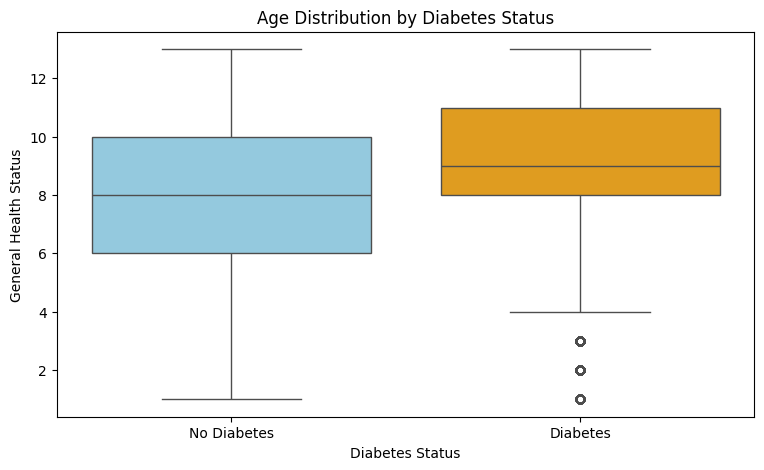

In [78]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='Diabetes',
    y='Age',
    data=df,
    palette=['skyblue', 'orange'],
    legend=False)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('General Health Status')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=10)
plt.show()

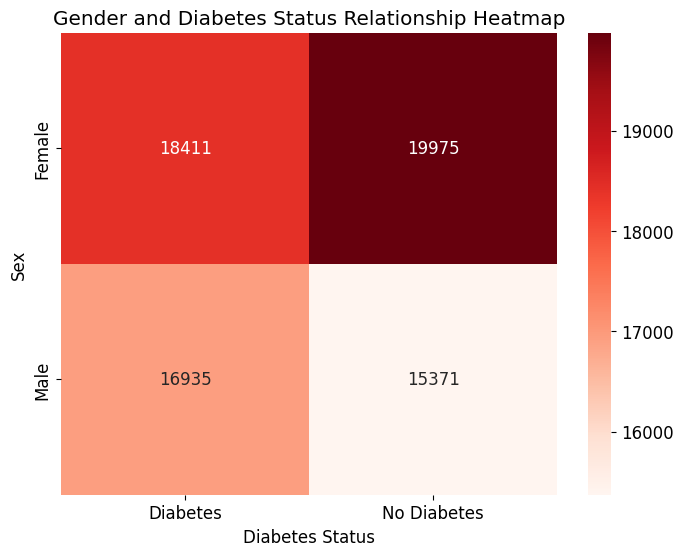

In [146]:
contingency_table = pd.crosstab(df['Sex'].map({0: 'Female', 1: 'Male'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Gender and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Sex')
plt.show()

In [83]:
diabetic_men = len(df[(df['Sex'] == 1) & (df['Diabetes'] == 1)])  
total_men = len(df[df['Sex'] == 1])

diabetic_women = len(df[(df['Sex'] == 0) & (df['Diabetes'] == 1)]) 
total_women = len(df[df['Sex'] == 0])  

diabetes_rate_men = diabetic_men / total_men
diabetes_rate_women = diabetic_women / total_women

print(f'Diabetes Rate-')
print(f'men: {diabetes_rate_men:.3f}')
print(f'women: {diabetes_rate_women:.3f}')

Diabetes Rate-
men: 0.543
women: 0.502


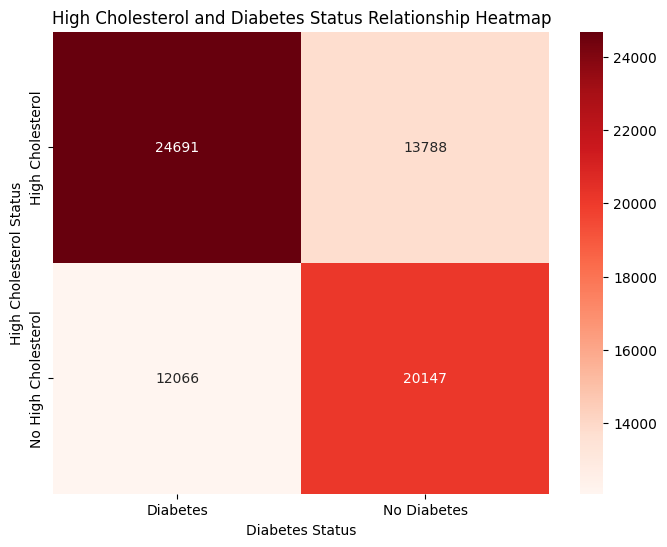

In [84]:
contingency_table = pd.crosstab(df['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('High Cholesterol and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('High Cholesterol Status')
plt.show()

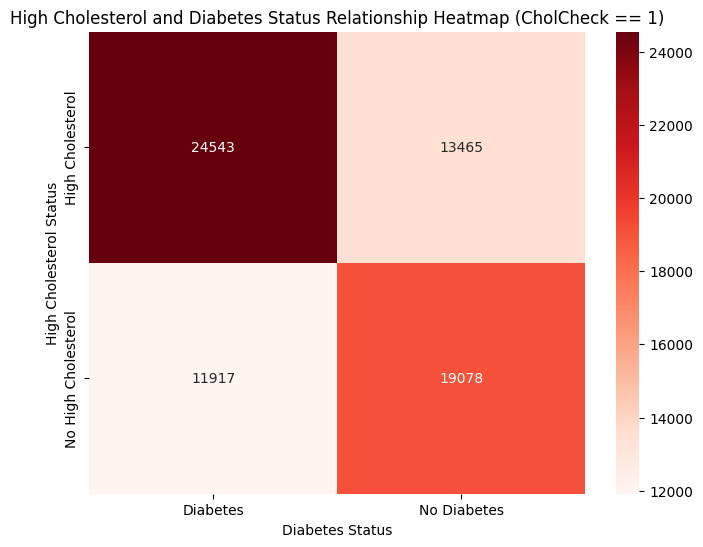

In [85]:
df_filtered = df[df['CholCheck'] == 1]
contingency_table = pd.crosstab(df_filtered['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'}),
                                df_filtered['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('High Cholesterol and Diabetes Status Relationship Heatmap (CholCheck == 1)')
plt.xlabel('Diabetes Status')
plt.ylabel('High Cholesterol Status')
plt.show()

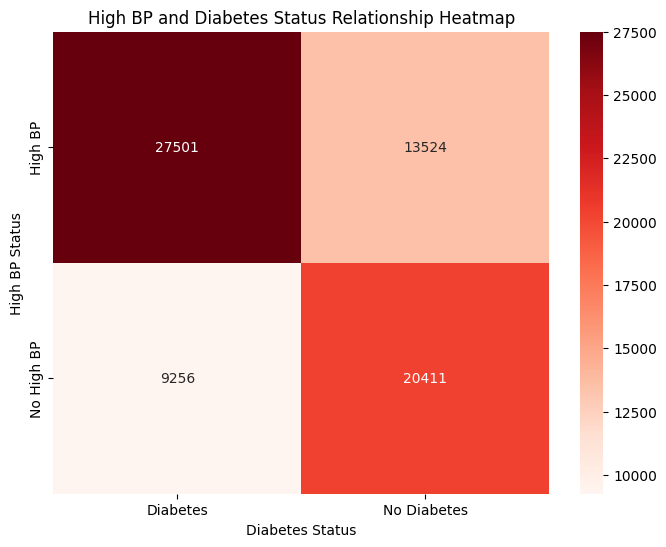

In [86]:
contingency_table = pd.crosstab(df['HighBP'].map({0: 'No High BP', 1: 'High BP'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('High BP and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('High BP Status')
plt.show()

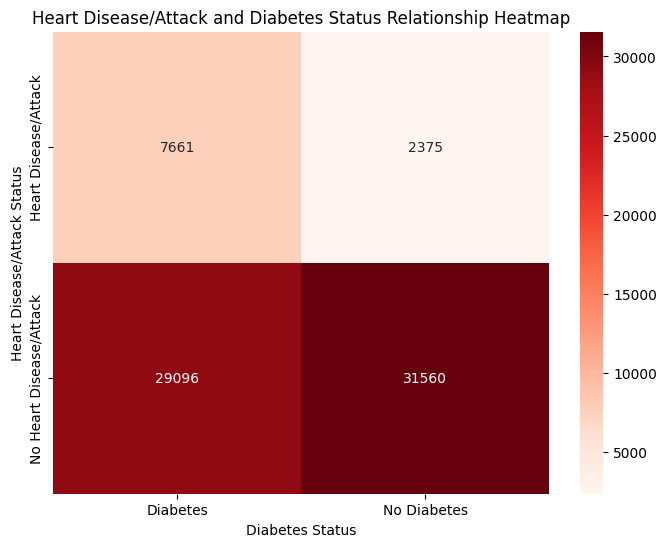

In [87]:
contingency_table = pd.crosstab(df['HeartDiseaseorAttack'].map({0: 'No Heart Disease/Attack', 1: 'Heart Disease/Attack'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Heart Disease/Attack and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Heart Disease/Attack Status')
plt.show()

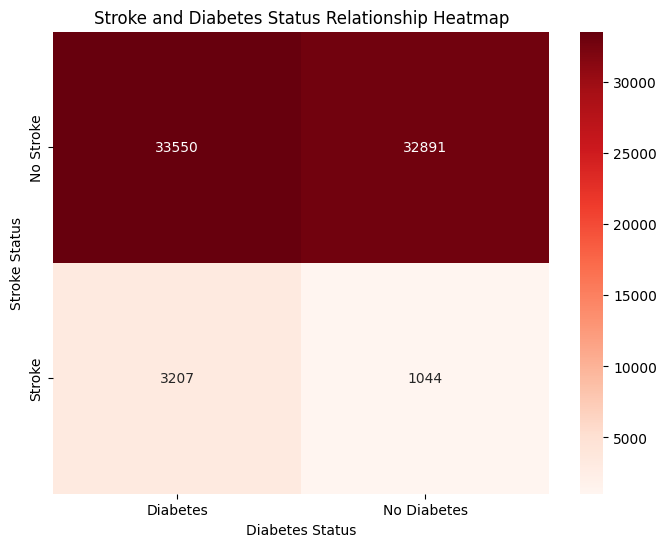

In [88]:
contingency_table = pd.crosstab(df['Stroke'].map({0: 'No Stroke', 1: 'Stroke'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Stroke and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Stroke Status')
plt.show()

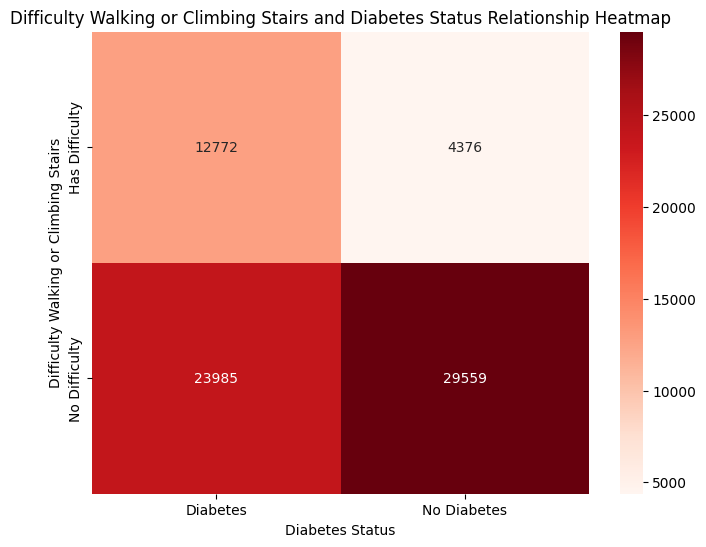

In [89]:
contingency_table = pd.crosstab(df['DiffWalk'].map({0: 'No Difficulty', 1: 'Has Difficulty'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Difficulty Walking or Climbing Stairs and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Difficulty Walking or Climbing Stairs')
plt.show()

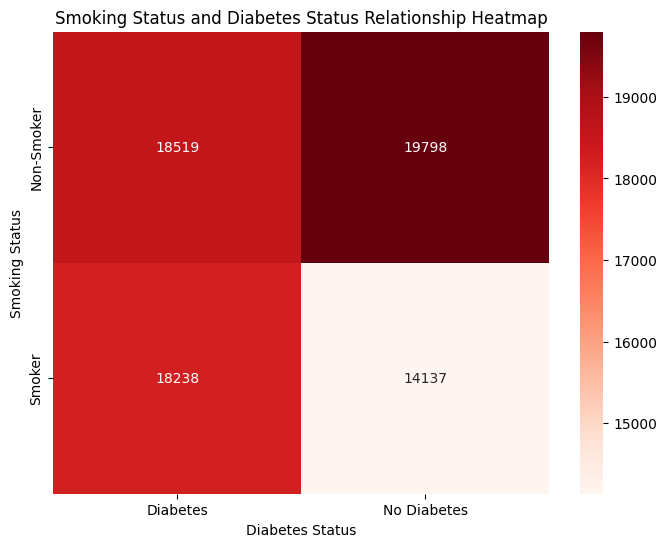

In [90]:
contingency_table_smoker = pd.crosstab(df['Smoker'].map({0: 'Non-Smoker', 1: 'Smoker'}),
                                       df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_smoker, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Smoking Status and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Smoking Status')
plt.show()

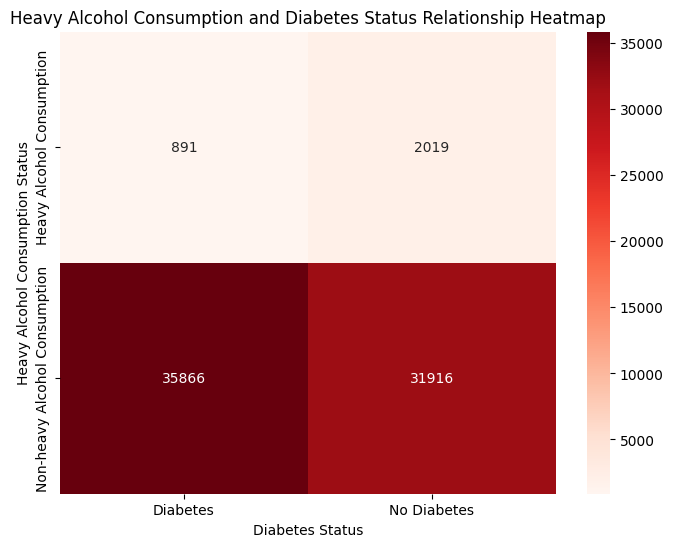

In [92]:
contingency_table_alcohol = pd.crosstab(df['HvyAlcoholConsump'].map({0: 'Non-heavy Alcohol Consumption', 1: 'Heavy Alcohol Consumption'}),
                                        df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_alcohol, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Heavy Alcohol Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Heavy Alcohol Consumption Status')
plt.show()

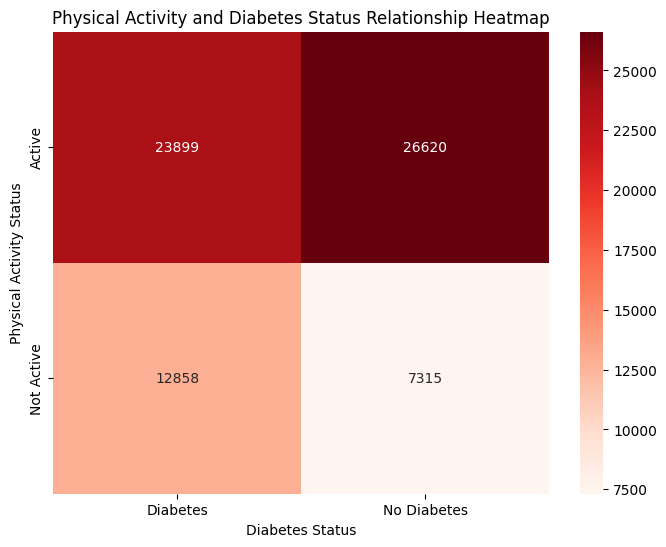

In [95]:
contingency_table_phys = pd.crosstab(df['PhysActivity'].map({0: 'Not Active', 1: 'Active'}),
                                     df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_phys, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Physical Activity and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Physical Activity Status')
plt.show()

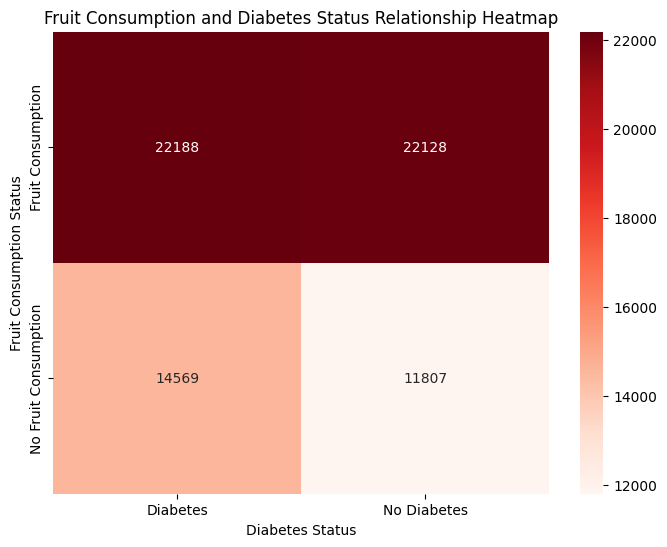

In [96]:
contingency_table_fruits = pd.crosstab(df['Fruits'].map({0: 'No Fruit Consumption', 1: 'Fruit Consumption'}),
                                       df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_fruits, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Fruit Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Fruit Consumption Status')
plt.show()

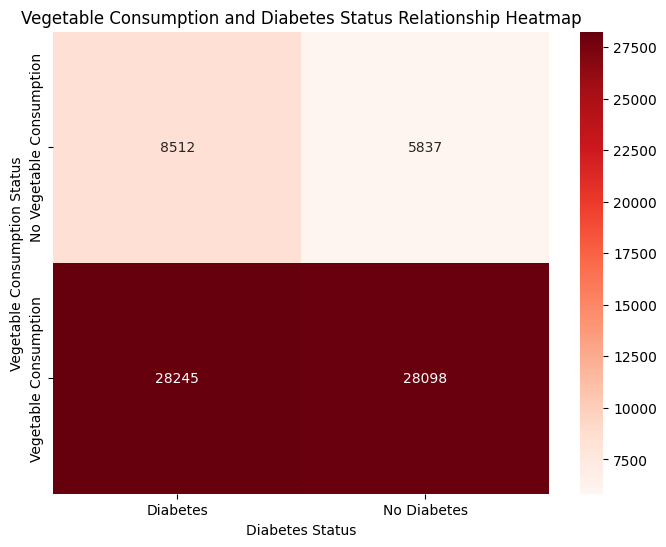

In [97]:
contingency_table_veggies = pd.crosstab(df['Veggies'].map({0: 'No Vegetable Consumption', 1: 'Vegetable Consumption'}),
                                        df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_veggies, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Vegetable Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Vegetable Consumption Status')
plt.show()

## Step 4 Feature Selection

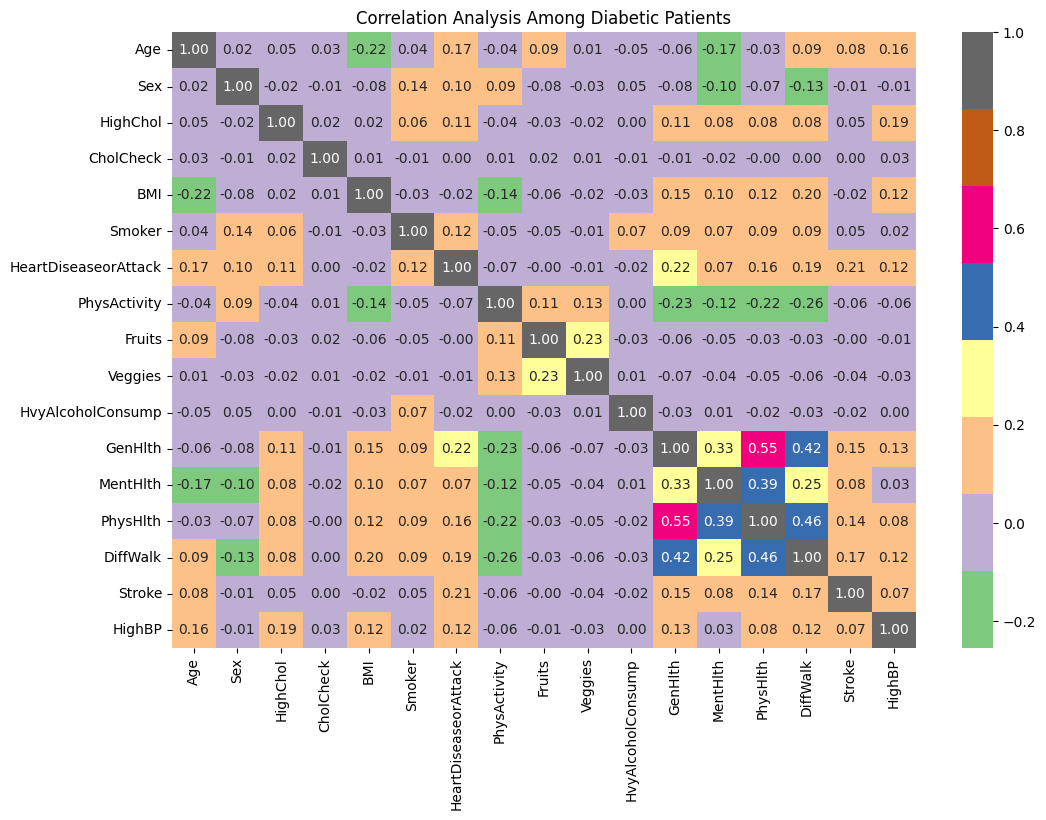

In [20]:
df_diabetes = df[df['Diabetes'] == 1]
df_diabetes_numeric = df_diabetes.drop(columns=['Diabetes']).select_dtypes(include=['float64'])
correlation_matrix = df_diabetes_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Accent', fmt='.2f', cbar=True)
plt.title('Correlation Analysis Among Diabetic Patients')
plt.show()

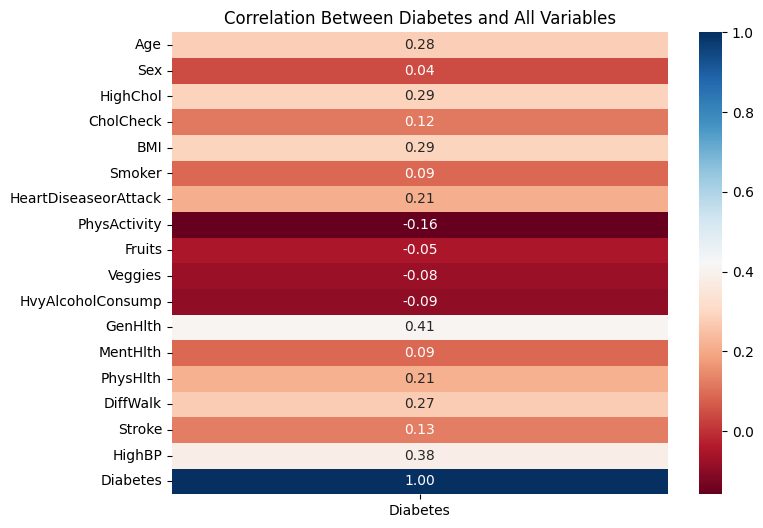

In [24]:
correlation_matrix = df.corr()
diabetes_related_corr = correlation_matrix[['Diabetes']]
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_related_corr, annot=True, cmap='RdBu', fmt='.2f', cbar=True)
plt.title('Correlation Between Diabetes and All Variables')
plt.show()

## Step 4 Feature Scaling

In [35]:
X = df.drop(['Diabetes'], axis=1)
y = df['Diabetes']

x_cols = X.columns
print(x_cols)

y.head(0)

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')


Series([], Name: Diabetes, dtype: float64)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(14139, 17)

In [37]:
cols = X_train.columns

In [38]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [40]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head(0)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP


## Step 5 Naive Bayes Implementation

In [143]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([0., 1., 0., ..., 1., 0., 1.])

In [42]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [43]:
from sklearn.metrics import accuracy_score

print('accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

accuracy: 0.7225


In [45]:
y_pred_train = gnb.predict(X_train)
print('accuracy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

accuracy: 0.7245


In [46]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7245
Test set score: 0.7225


In [47]:
y_test.value_counts()
null_accuracy = (7407/(7407+2362))
print('Null accuracy: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.7225 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5133 1957]
 [1967 5082]]


<Axes: >

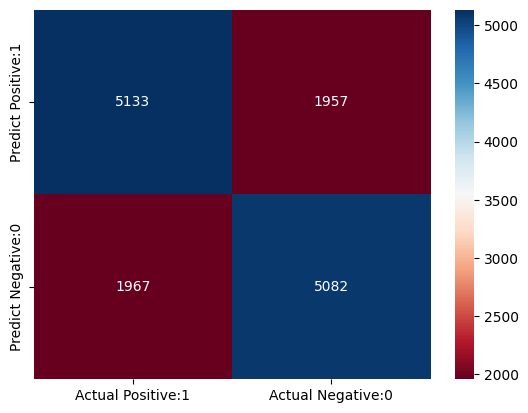

In [61]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdBu')

In [62]:
TP = cm[0,0] #true positive
TN = cm[1,1] #true negative
FP = cm[0,1] #false positive
FN = cm[1,0] #false negative

In [65]:
print(TP, TN, FP, FN)

5133 5082 1957 1967


In [66]:
class_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

Classification accuracy : 0.7225


In [67]:
class_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(class_error))

Classification error : 0.2775


In [68]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7240


In [69]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7230


In [70]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7230


In [71]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2780


In [72]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7220


In [74]:
y_pred_prob = gnb.predict_proba(X_test)[0:5]
y_pred_prob

array([[6.92334152e-01, 3.07665848e-01],
       [2.18067353e-01, 7.81932647e-01],
       [6.88905693e-01, 3.11094307e-01],
       [5.29116656e-01, 4.70883344e-01],
       [5.66982798e-04, 9.99433017e-01]])

## Observations

### In each row, the numbers sum to 1.

### There are 2 columns which correspond to 2 classes - Diabetic and non-diabetic.
    Class 0 => if a person does not have diabetes.
    Class 1 => if a person has diabetis.

### Importance of predicted probabilities
    We can rank the observations by probability of whether a person is diabetic or non-diabetic.

### predict_proba process
    Predicts the probabilities
    Choose the class with the highest probability

### Classification threshold level
    There is a classification threshold level of 0.5.
    Class 0 => A person does not have diabetes < 0.5.
    Class 1 => A person have diabetes > 0.5.

In [76]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Diabetes', 'Prob of no Diabetes'])
y_pred_prob_df

,Prob of Diabetes,Prob of no Diabetes
0,0.692334,0.307666
1,0.218067,0.781933
2,0.688906,0.311094
3,0.529117,0.470883
4,0.000567,0.999433


In [77]:
gnb.predict_proba(X_test)[0:10, 1]
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

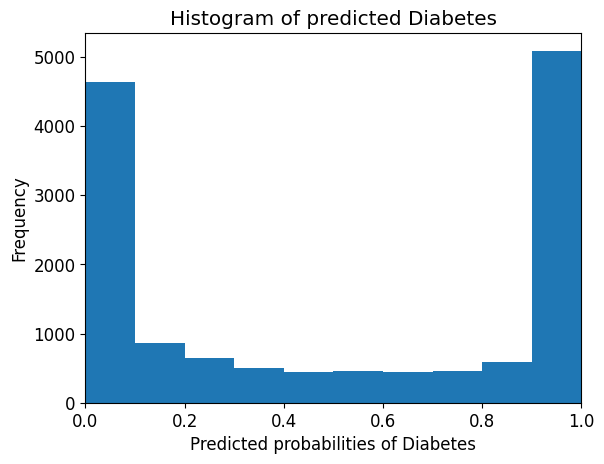

In [78]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted Diabetes')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of Diabetes')
plt.ylabel('Frequency')

## Observations

We can see that the above histogram is highly positive skewed.

The first column tell us that there are approximately 4700 observations with probability between 0.0 and 0.1.

There are relatively small number of observations with probability > 0.5.

So, these small number of observations predict that the person have diabetes.

There is almost an equal distribution of people with and without diabetes

## Step 6 Decision tree Implementation

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd

In [92]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

In [93]:
print('Test Accuracy: {:.4f}'.format(dt.score(X_train, y_train)))

Test Accuracy: 0.7196


In [85]:
y_pred_train = dt.predict(X_train)
print('Training Accuracy: {:.4f}'.format(accuracy_score(y_train, y_pred_train)))

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training Accuracy: 0.9718
Training set score: 0.9718
Test set score: 0.6566


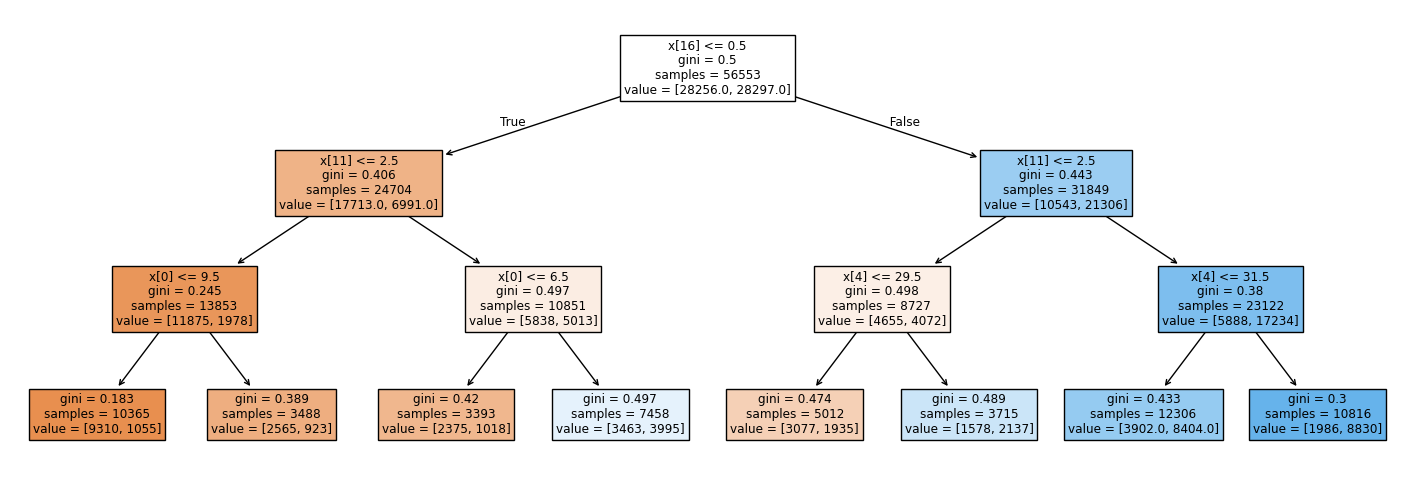

In [135]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt.fit(X_train, y_train)

plt.figure(figsize=(18, 6))
plot_tree(dt, filled=True)
plt.show()

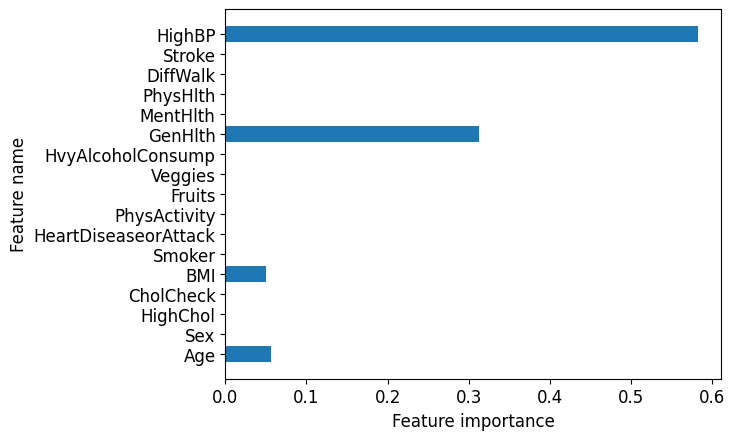

In [138]:
feature_names = X.columns.values

def plot_feature_importances(dt, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), dt.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
plot_feature_importances(dt, feature_names)

<Axes: >

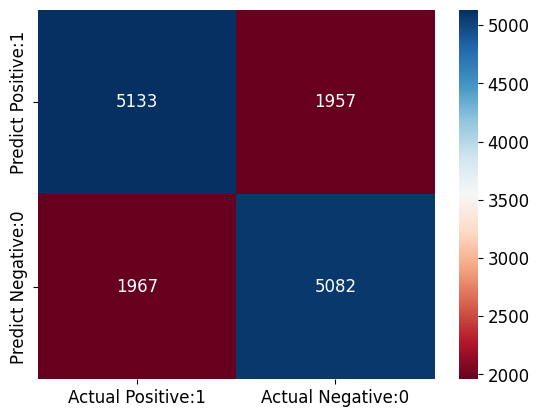

In [116]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdBu')

In [117]:
TP = cm[0, 0]  # True Positive
TN = cm[1, 1]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

In [118]:
print(TP, TN, FP, FN)

5133 5082 1957 1967


In [119]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification Accuracy: {:.4f}'.format(classification_accuracy))

Classification Accuracy: 0.7225


In [120]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error: {:.4f}'.format(classification_error))

Classification Error: 0.2775


In [121]:
precision = TP / float(TP + FP)
print('Precision: {:.4f}'.format(precision))

Precision: 0.7240


In [122]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {:.4f}'.format(recall))

Recall or Sensitivity: 0.7230


In [123]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate: {:.4f}'.format(true_positive_rate))

True Positive Rate: 0.7230


In [124]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate: {:.4f}'.format(false_positive_rate))

False Positive Rate: 0.2780


In [125]:
specificity = TN / (TN + FP)
print('Specificity: {:.4f}'.format(specificity))

Specificity: 0.7220


In [126]:
y_pred_prob = dt.predict_proba(X_test)[0:5]
print('Predicted Probabilities (first 5 rows):\n', y_pred_prob)

Predicted Probabilities (first 5 rows):
 [[0.4643336  0.5356664 ]
 [0.4643336  0.5356664 ]
 [0.61392658 0.38607342]
 [0.4643336  0.5356664 ]
 [0.18361686 0.81638314]]


In [127]:
y_pred_prob = dt.predict_proba(X_test)

# Convert probabilities to a DataFrame
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Diabetes', 'Prob of No Diabetes'])
print(y_pred_prob_df.head())  # Display the first few rows

   Prob of Diabetes  Prob of No Diabetes
0          0.464334             0.535666
1          0.464334             0.535666
2          0.613927             0.386073
3          0.464334             0.535666
4          0.183617             0.816383


In [128]:
y_pred1 = y_pred_prob[:, 1]  # Probabilities for the class 'Diabetes'

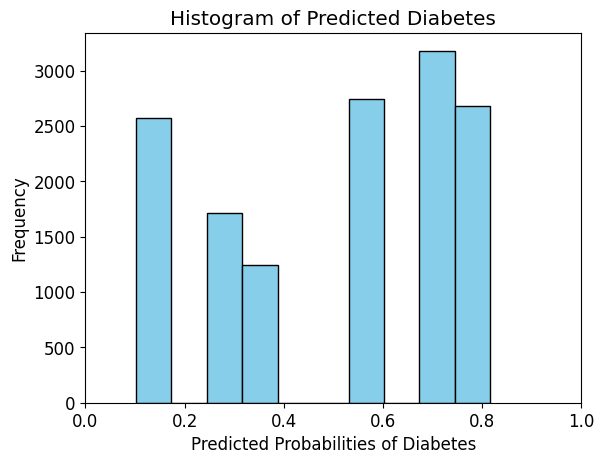

In [129]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Diabetes')
plt.xlim(0, 1)
plt.xlabel('Predicted Probabilities of Diabetes')
plt.ylabel('Frequency')
plt.show()

## Step 7 Comparing both the models

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_predictions = dt.predict(X_test)

gnb_predictions = gnb.predict(X_test)

# Compare Accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, gnb_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")

# Optional: Print Detailed Classification Reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, gnb_predictions))


Decision Tree Accuracy: 0.7162
Naïve Bayes Accuracy: 0.7225

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.61      0.68      7090
         1.0       0.68      0.83      0.74      7049

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.71     14139
weighted avg       0.73      0.72      0.71     14139


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      7090
         1.0       0.72      0.72      0.72      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



In [133]:
from sklearn.model_selection import cross_val_score

dt_cv = cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()
nb_cv = cross_val_score(gnb, X, y, cv=5, scoring='accuracy').mean()

print(f"Decision Tree Cross-Validated Accuracy: {dt_cv:.4f}")
print(f"Naïve Bayes Cross-Validated Accuracy: {nb_cv:.4f}")


Decision Tree Cross-Validated Accuracy: 0.7128
Naïve Bayes Cross-Validated Accuracy: 0.7236


### Conclusion:

Both the models have almost the same acuracy with Decison Tree being 71.28% accurate and Naive Bayes 72.36%. Based on these results, Naïve Bayes is the slightly better model for this dataset due to its balanced and consistent performance. However, Decision Tree is still competitive and may be preferred if interpretability or class-specific optimization is required.